# Applied 8
## Imports


In [77]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [78]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


## Response and Predicotr

In [79]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
      'lstat': Auto['horsepower']})
Y  = Auto['mpg']


## Fitting a model

In [97]:
model = sm.OLS(Y, X) #Ordinary Least Squares
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        20:34:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

## Summaraizing a results

In [81]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
lstat,-0.1578,0.006,-24.489,0.0


## Plotting a result

In [90]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

intercept    39.935861
lstat        -0.157845
dtype: float64


/tmp/ipykernel_11706/3984744010.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--')


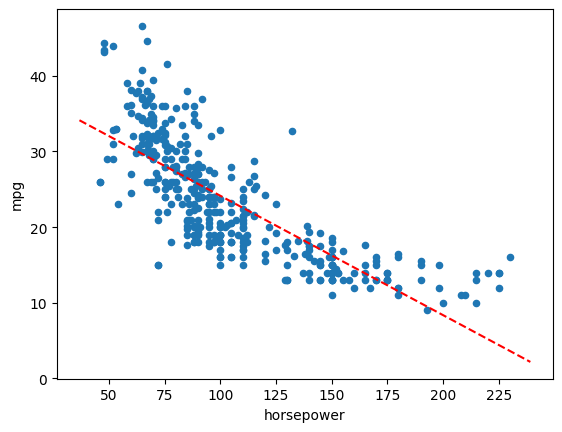

In [95]:
from matplotlib.pyplot import axline

ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1], 'r--')

## Questions
### i. 
Basing on plot, low p-value and relatively high t-static there is a relation between horsepower and mpg
### ii. 
As far as std of lstat (slope) is very low it must be a strong relation.
### iii. 
The relation is negative (basing on the plot you can see it) as negative lstat (with low std) suggests that data is decreasing
### iv.

In [113]:
y=results.get_prediction((1,98))
print("prediction: " + str(y.predicted_mean))
print("confidence intervals: " + str(y.conf_int(alpha=0.05)))

prediction: [24.46707715]
confidence intervals: [[23.97307896 24.96107534]]


It says that with 95% probability the for horsepower=98 mpg is in range of [23.97, 24.96]. 

## Diagnostic Plots

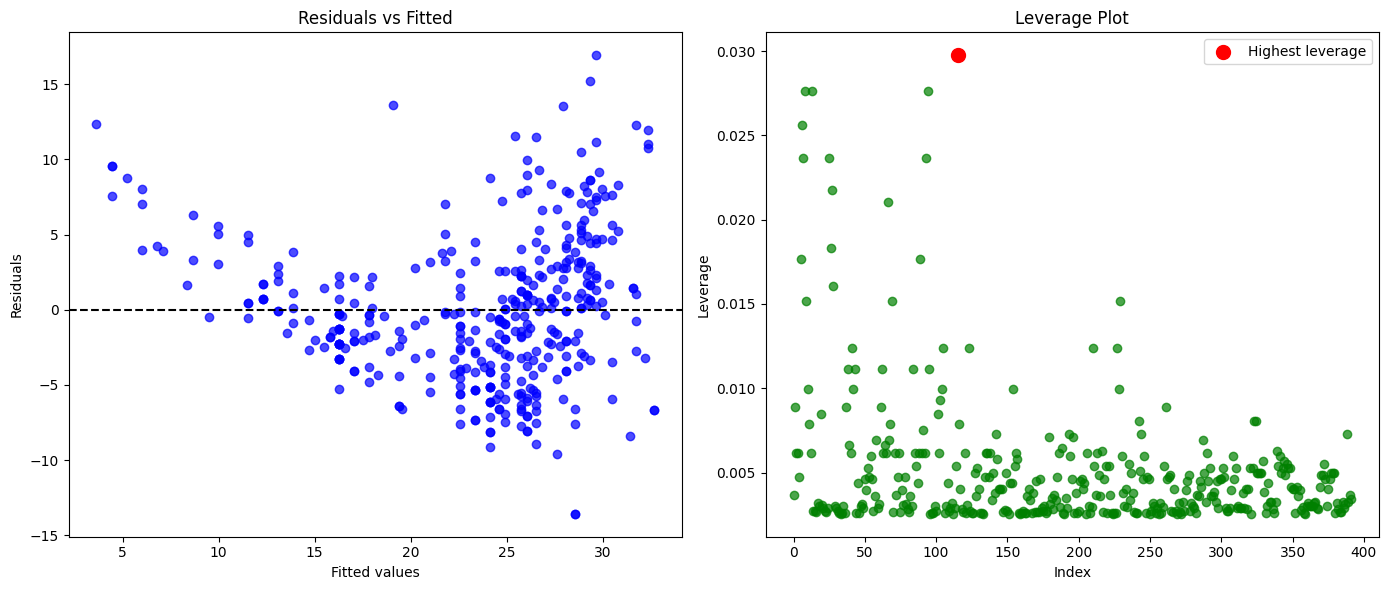

In [119]:
import matplotlib.pyplot as plt

# Assume results is your fitted sm.OLS model
infl = results.get_influence()
leverage = infl.hat_matrix_diag
residuals = results.resid
fitted = results.fittedvalues

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Residuals vs Fitted
axes[0].scatter(fitted, residuals, color='blue', alpha=0.7)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted')

# 2️⃣ Leverage plot
axes[1].scatter(np.arange(len(leverage)), leverage, color='green', alpha=0.7)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('Leverage Plot')

# Highlight the most influential point in leverage plot
most_influential = np.argmax(leverage)
axes[1].scatter(most_influential, leverage[most_influential], color='red', s=100, label='Highest leverage')
axes[1].legend()

plt.tight_layout()
plt.show()

## Comment on Plots
### Residual vs Fitted
As we can see ont the fitted values vs residuals the erros is growing along with fitted values. However we should note that that most point in low values (0,10) are underestimated.

### Levrage Point
Look below for calculated:
$$
\frac{1+p}{n}
$$

As Levrage is not generally exceeding 0.005 (calculated below) we could assume the fit is relatively good. On the other side there is plenty of points with high levrage for low indexes.

### Summary
Both plots suggests that there is a problem in small fitted values. As for "big" numbers relation is linear. You can say it about low numbers.

In [129]:
## Aditional calc for levrage
h_help = 2/X.shape[0]
print(h_help)

0.00510204081632653


# Applied 9